In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import xgboost as xgb
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

# TRAIN

In [2]:
train = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
# train = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/train.csv')
# train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Types

**ORDINAL
_________
LotShape
LandContour
Utilities
LandSlope
OverallQual
OverallCond
YearBuilt*
YearRemodAdd
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageYrBlt*
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscVal*

**NOMINAL
_________
MSSubClass
MSZoning
Street
Alley
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
GarageType
PavedDrive
MiscFeature
SaleType
SaleCondition

**CONTINUOUS
_________
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MoSold
YrSold

Null Features

In [5]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Cleaning

### Duplicates

In [6]:
train['Id'].value_counts()

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

### Null Features

#### Lot Frontage

In [7]:
null_LotFrontage = train[train['LotFrontage'].isnull()]
null_LotFrontage

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952

In [8]:
train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [9]:
null_LotFrontage['Neighborhood'].value_counts()

Neighborhood
NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Somerst     8
NoRidge     8
Edwards     8
Timber      8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
Blmngtn     3
IDOTRR      3
NPkVill     2
MeadowV     2
SWISU       2
NridgHt     1
Name: count, dtype: int64

In [10]:
train.groupby('Neighborhood')['LotFrontage'].agg(pd.Series.mode)

Neighborhood
Blmngtn                   43.0
Blueste                   24.0
BrDale                    21.0
BrkSide                   50.0
ClearCr                   80.0
CollgCr           [65.0, 70.0]
Crawfor                   80.0
Edwards                   60.0
Gilbert     [59.0, 60.0, 65.0]
IDOTRR                    60.0
MeadowV                   21.0
Mitchel    [32.0, 75.0, 100.0]
NAmes                     70.0
NPkVill                   24.0
NWAmes                    80.0
NoRidge           [82.0, 92.0]
NridgHt                  107.0
OldTown                   60.0
SWISU                     60.0
Sawyer                    70.0
SawyerW                   65.0
Somerst                   75.0
StoneBr                   41.0
Timber                    85.0
Veenker                   80.0
Name: LotFrontage, dtype: object

In [11]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [12]:
train['LotFrontage'].isnull().sum()

0

#### Alley

In [13]:
train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [14]:
train['Alley'].isnull().sum()

1369

In [15]:
train['Alley'] = np.where(train['Alley'].isnull, 'NA', train['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [16]:
train['Alley'].isnull().sum()

0

#### MasVnrType

In [17]:
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [18]:
train['MasVnrType'].isnull().sum()

872

In [19]:
train['MasVnrType'] = np.where(train['MasVnrType'].isnull, 'NA', train['MasVnrType']) #it is missing None and is the largest value count

In [20]:
train['MasVnrType'].isnull().sum()

0

#### BsmtQual

In [21]:
train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [22]:
train['BsmtQual'].isnull().sum()

37

In [23]:
train['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [24]:
train[(train['TotalBsmtSF']==0) & (train['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0

In [25]:
train['BsmtQual'] = np.where(train['BsmtQual'].isnull, 'NA', train['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [26]:
train['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [27]:
train['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [28]:
train['BsmtCond'].isnull().sum()

37

In [29]:
train['BsmtCond'] =  np.where(train['BsmtCond'].isnull, 'NA', train['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [30]:
train['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [31]:
train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [32]:
train['BsmtExposure'].isnull().sum()

38

In [33]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0

In [34]:
train['BsmtExposure'] = np.where((train['BsmtExposure'].isnull()) & (train['TotalBsmtSF']==0), 'NA', train['BsmtExposure'])

In [35]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,144.0,Gd,TA,PConc,NA,NA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [36]:
train['BsmtExposure'] = np.where(train['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), train['BsmtExposure'])

In [37]:
train['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [38]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [39]:
train['BsmtFinType1'].isnull().sum()

37

In [40]:
train['BsmtFinType1'] = np.where(train['BsmtFinType1'], 'NA', train['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [41]:
train['BsmtFinType1'].isnull().sum()

0

#### BsmtFinType2

In [42]:
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [43]:
train['BsmtFinType2'].isnull().sum()

38

In [44]:
train[train['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,NA,296.0,Gd,TA,PConc,NA,NA,No,NA,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,N

In [45]:
train['BsmtFinType2'] = np.where((train['BsmtFinType2'].isnull() & train['BsmtUnfSF'] > 0), 'Unf', train['BsmtFinType2'])

In [46]:
train['BsmtFinType2'].isnull().sum()

37

In [47]:
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isnull(), 'NA', train['BsmtFinType2'])

In [48]:
train['BsmtFinType2'].isnull().sum()

0

#### Electrical

In [49]:
train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [50]:
train['Electrical'].isnull().sum()

1

In [51]:
train['Electrical'] = np.where(train['Electrical'].isnull(), train['Electrical'].mode(), train['Electrical']) # only 1 null value, just filled it in with mode

In [52]:
train['Electrical'].isnull().sum()

0

#### FireplaceQu

In [53]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [54]:
train['FireplaceQu'].isnull().sum()

690

In [55]:
train[train['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,NA,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,Wood,NA,NA,No,NA,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,70.0,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NA,80.0,TA,TA,PConc,NA,NA,Gd,NA,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,NA,NA,No,NA,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,NA,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd

In [56]:
train['FireplaceQu'] = np.where((train['FireplaceQu'].isnull() & train['Fireplaces']==0), 'NA', train['FireplaceQu'])

In [57]:
train['FireplaceQu'].isnull().sum()

0

#### GarageType

In [58]:
train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [59]:
train['GarageType'].isnull().sum()

81

In [60]:
train['GarageType'] = np.where((train['GarageType'].isnull() & (train['GarageCars']== 0)), 'NA', train['GarageType']) #if 0 cars then no garage

In [61]:
train['GarageType'].isnull().sum()

0

#### GarageYrBlt

In [62]:
train['GarageYrBlt'].isnull().sum()

81

In [63]:
train['GarageYrBlt'] = np.where((train['GarageYrBlt'].isnull() & (train['GarageCars']==0)), 0, train['GarageYrBlt']) #if 0 cars then no garage

In [64]:
train['GarageYrBlt'].isnull().sum()

0

#### GarageFinish

In [65]:
train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [66]:
train['GarageFinish'].isnull().sum()

81

In [67]:
train['GarageFinish'] = np.where((train['GarageFinish'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageFinish']) #if 0 cars then no garage

In [68]:
train['GarageFinish'].isnull().sum()

0

#### GarageQual

In [69]:
train['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [70]:
train['GarageQual'].isnull().sum()

81

In [71]:
train['GarageQual'] = np.where((train['GarageQual'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageQual']) #if 0 cars then no garage

In [72]:
train['GarageQual'].isnull().sum()

0

#### GarageCond

In [73]:
train['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [74]:
train['GarageCond'].isnull().sum()

81

In [75]:
train['GarageCond'] = np.where((train['GarageCond'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageCond']) #if 0 cars then no garage

In [76]:
train['GarageCond'].isnull().sum()

0

#### PoolQC

In [77]:
train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [78]:
train['PoolQC'].isnull().sum()

1453

In [79]:
train[train['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,NA,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Gd,NA,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,NA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,NA,162.0,Gd,TA,PConc,NA,NA,Mn,NA,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,NA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,NA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NA,350.0,Gd,TA,PConc,NA,NA,Av,NA,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,NA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,NA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,NA,119.0,TA,TA,CBlock,NA,NA,No,NA,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,NA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Ex,Gd,Stone,NA,NA,No,NA,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,NA,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,NA,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ

In [80]:
train['PoolQC'] = np.where((train['PoolQC'].isnull() & (train['PoolArea']==0)), 'NA', train['PoolQC']) #if no pool area means no pool

In [81]:
train['PoolQC'].isnull().sum()

0

#### Fence

In [82]:
train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [83]:
train['Fence'].isnull().sum()

1179

In [84]:
train['Fence'] = np.where(train['Fence'].isnull(), 'NA', train['Fence']) #largest value that's null and missing category 

In [85]:
train['Fence'].isnull().sum()

0

#### MiscFeature

In [86]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [87]:
train['MiscFeature'].isnull().sum()

1406

In [88]:
train['MiscFeature'] = np.where((train['MiscFeature'].isnull() & (train['GarageType']=='2Types')), 'Gar2', train['MiscFeature']) #if 2types of garage then its 2nd garage

In [89]:
train['MiscFeature'] = np.where(train['MiscFeature'].isnull(), 'NA', train['MiscFeature'])

In [90]:
train['MiscFeature'].isnull().sum()

0

## Outliers

### LotArea

<Axes: >

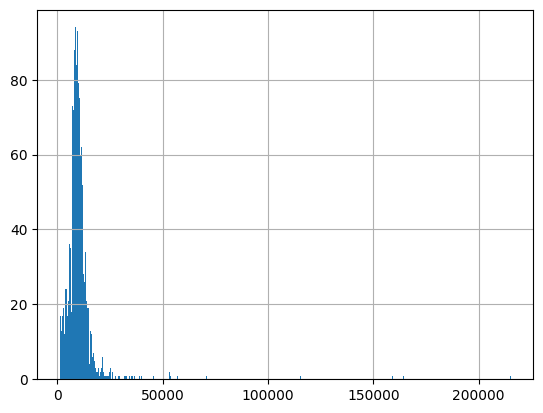

In [91]:
train['LotArea'].hist(bins=500)

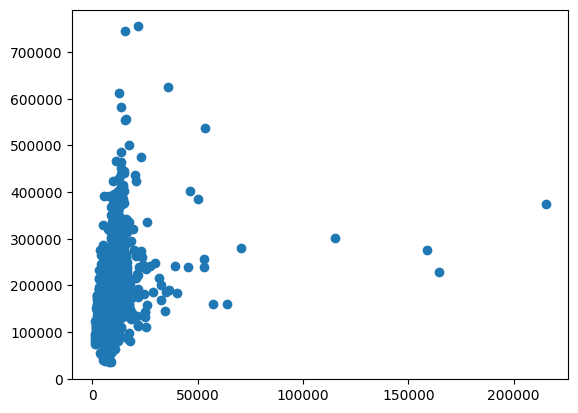

In [92]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [93]:
train = train.drop(train[train['LotArea']> 150000].index).reset_index(drop=True)

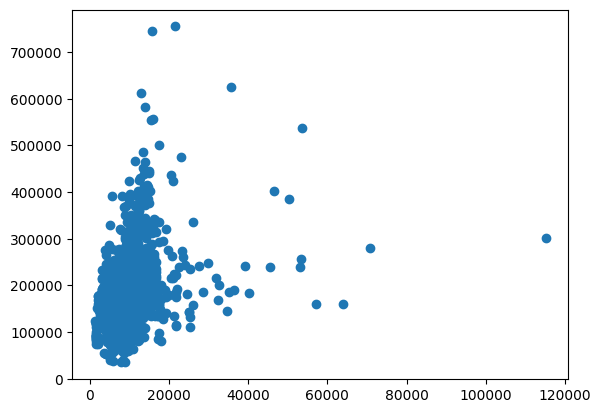

In [94]:
plt.scatter(train['LotArea'], train['SalePrice'])

## Correlation

In [95]:
train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=True)

Id               0.018995
BsmtFinSF2       0.019646
BsmtHalfBath     0.019779
MiscVal          0.022438
LowQualFinSF     0.025323
YrSold           0.030058
3SsnPorch        0.045045
MoSold           0.046604
OverallCond      0.078477
MSSubClass       0.084533
PoolArea         0.092854
ScreenPorch      0.112546
EnclosedPorch    0.127887
KitchenAbvGr     0.135659
BedroomAbvGr     0.167278
BsmtUnfSF        0.217194
BsmtFullBath     0.223516
GarageYrBlt      0.261471
HalfBath         0.287275
OpenPorchSF      0.317711
2ndFlrSF         0.321187
WoodDeckSF       0.327765
LotArea          0.335973
LotFrontage      0.340380
BsmtFinSF1       0.384189
Fireplaces       0.464095
MasVnrArea       0.479087
YearRemodAdd     0.510137
YearBuilt        0.525154
TotRmsAbvGrd     0.533438
FullBath         0.560216
1stFlrSF         0.604042
TotalBsmtSF      0.611589
GarageArea       0.625065
GarageCars       0.641281
GrLivArea        0.708303
OverallQual      0.792692
SalePrice        1.000000
Name: SalePr

## Encoding/Scaling

In [96]:
df = train.copy()

### Ordinal

In [97]:
ord_feats = train[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

ord = OrdinalEncoder()
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,3.0,3.0,0.0,0.0,5.0,5.0,79.0,38.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,4.0,1.0,3.0,2.0,0.0,65.0,3.0,5.0,5.0,3.0,2.0,0.0
1454,3.0,3.0,0.0,0.0,6.0,8.0,44.0,56.0,0.0,2.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,30.0,2.0,5.0,5.0,3.0,0.0,17.0
1455,3.0,3.0,0.0,0.0,4.0,5.0,51.0,46.0,3.0,4.0,0.0,0.0,2.0,0.0,5.0,2.0,1.0,2.0,6.0,0.0,37.0,3.0,5.0,5.0,3.0,4.0,0.0


In [98]:
df.drop(columns=ord_feats, inplace=True)
df = df.merge(new_ord_feats, left_index=True, right_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1,60,RL,65.0,8450,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,196.0,PConc,706,0,150,856,GasA,SBrkr,856,854,0,1710,1,0,2,1,3,1,8,0,Attchd,2,548,Y,0,61,0,0,0,0,NA,2,2008,WD,Normal,208500,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,2,20,RL,80.0,9600,Pave,NA,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,0.0,CBlock,978,0,284,1262,GasA,SBrkr,1262,0,0,1262,0,1,2,0,3,1,6,1,Attchd,2,460,Y,298,0,0,0,0,0,NA,5,2007,WD,Normal,181500,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,3,60,RL,68.0,11250,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,162.0,PConc,486,0,434,920,GasA,SBrkr,920,866,0,1786,1,0,2,1,3,1,6,1,Attchd,2,608,Y,0,42,0,0,0,0,NA,9,2008,WD,Normal,223500,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,4,70,RL,60.0,9550,Pave,NA,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,BrkTil,216,0,540,756,GasA,SBrkr,961,756,0,1717,1,0,1,0,3,1,7,1,Detchd,3,642,Y,0,35,272,0,0,0,NA,2,2006,WD,Abnorml,140000,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,5,60,RL,84.0,14260,Pave,NA,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,350.0,PConc,655,0,490,1145,GasA,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,9,1,Attchd,3,836,Y,192,84,0,0,0,0,NA,12,2008,WD,Normal,250000,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,60,RL,62.0,7917,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,PConc,0,0,953,953,GasA,SBrkr,953,694,0,1647,0,0,2,1,3,1,7,1,Attchd,2,460,Y,0,40,0,0,0,0,NA,8,2007,WD,Normal,175000,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,1457,20,RL,85.0,13175,Pave,NA,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,NA,119.0,CBlock,790,163,589,1542,GasA,SBrkr,2073,0,0,2073,1,0,2,0,3,1,7,2,Attchd,2,500,Y,349,0,0,0,0,0,NA,2,2010,WD,Normal,210000,3.0,3.0,0.0,0.0,5.0,5.0,79.0,38.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,4.0,1.0,3.0,2.0,0.0,65.0,3.0,5.0,5.0,3.0,2.0,0.0
1454,1458,70,RL,66.0,9042,Pave,NA,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Stone,275,0,877,1152,GasA,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,9,2,Attchd,1,252,Y,0,60,0,0,0,0,Shed,5,2010,WD,Normal,266500,3.0,3.0,0.0,0.0,6.0,8.0,44.0,56.0,0.0,2.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,30.0,2.0,5.0,5.0,3.0,0.0,17.0
1455,1459,20,RL,68.0,9717,Pave,NA,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NA,0.0,CBlock,49,1029,0,1078,Gas

## Nominal Encoding

In [99]:
nom_feats = train[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition'
]]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,70,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,60,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0

In [100]:
df.drop(columns=nom_feats, inplace=True)
df = df.merge(nom_feats_encoded, left_index=True, right_index=True)
df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,2,2008,208500,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,5,2007,181500,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,20,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,9,2008,223500,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,2,2006,140000,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,70,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,12,2008,250000,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,62.0,7917,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,8,2007,175000,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,0.0

## Scaling

In [101]:
scaler_minmax = MinMaxScaler()
cont_feats = train[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'
]]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.150685,0.062802,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.090909,0.50
1,0.202055,0.072904,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.25
2,0.160959,0.087396,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.727273,0.50
3,0.133562,0.072464,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.090909,0.00
4,0.215753,0.113835,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.140411,0.058121,0.000000,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.0,0.247362,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.636364,0.25
1453,0.219178,0.104305,0.074375,0.139972,0.110583,0.252140,0.252373,0.399036,0.000000,0.0,0.327619,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.666667,0.50,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.090909,1.00
1454,0.154110,0.068002,0.000000,0.048724,0.000000,0.375428,0.188543,0.195961,0.557869,0.0,0.377920,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.583333,0.666667,0.25,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.363636,1.00
1455,0.160959,0.073931,0.000000,0.008682,0.698100,0.000000,0.176432,0.170721,0.000000,0.0,0.140166,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.272727,1.00


In [102]:
df.drop(columns=cont_feats, inplace=True)
df = df.merge(new_cont_feats, left_index=True, right_index=True)

## Drop Features

In [103]:
df

,Id,SalePrice,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,...,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,208500,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.150685,0.062802,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.090909,0.50
1,2,181500,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.202055,0.072904,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.25
2,3,223500,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.160959,0.087396,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.727273,0.50
3,4,140000,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,70,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.133562,0.072464,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.090909,0.00
4,5,250000,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.215753,0.113835,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565,0.0

## Train Test Split

In [104]:
y = df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1452    175000
1453    210000
1454    266500
1455    142125
1456    147500
Name: SalePrice, Length: 1457, dtype: int64

In [105]:
x = df.drop(['Id', 'SalePrice'], axis=1)
x

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,...,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.150685,0.062802,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.090909,0.50
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.202055,0.072904,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.25
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.160959,0.087396,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.727273,0.50
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,70,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.133562,0.072464,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.090909,0.00
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,60,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.215753,0.113835,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1165, 218), (1165,), (292, 218), (292,))

In [107]:
xgbr = xgb.XGBRegressor(n_estimators=1000, max_depth=2)
xgbr.fit(xtrain, ytrain)
test_pred = xgbr.predict(xtest)
test_pred

array([242012.62 , 169693.08 , 140749.88 , 414806.06 , 270022.75 ,
        96074.79 , 222104.61 , 136099.69 , 235585.23 , 274549.7  ,
        97796.375, 206919.39 , 312820.72 , 137185.39 , 169539.58 ,
       159844.73 , 226418.25 ,  82958.25 , 135680.7  , 141507.11 ,
       275290.84 , 141499.5  , 118359.37 , 107163.12 , 121107.05 ,
       137655.6  , 186638.45 , 129900.55 , 146227.1  , 131863.23 ,
       144727.44 , 223398.2  , 170410.23 , 194177.33 , 193784.33 ,
       150164.84 , 121953.48 , 122066.14 , 159200.95 , 102742.055,
       115449.41 , 356921.28 , 172082.02 , 121219.48 , 159632.08 ,
       226183.52 , 133597.62 , 216447.23 ,  76138.266, 277790.6  ,
       235077.05 , 375463.34 ,  88330.97 , 244339.06 , 347104.25 ,
       174425.78 , 281814.56 ,  89617.99 , 161444.45 , 118593.76 ,
       158622.72 , 116473.65 , 142564.81 , 134178.67 , 106531.81 ,
       114743.65 , 197139.1  , 170565.17 , 126934.95 , 134152.52 ,
       135708.3  , 120346.664,  90961.09 , 138530.61 , 411701.

## RMSE

In [108]:
train_pred = xgbr.predict(xtrain)
train_pred

array([ 91355.31 ,  93673.086,  99166.23 , ...,  95136.5  , 108918.7  ,
       144887.75 ], dtype=float32)

In [109]:
print('RMSE Test:', mean_squared_error(ytest, test_pred)**0.5)
print('RMSE Train:', mean_squared_error(ytrain, train_pred)**0.5)

RMSE Test: 32740.562772743637
RMSE Train: 3146.2781100096613


Baseline: removed outliers
RMSE : 31810.004274811527

# TEST

In [110]:
test = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [111]:
# test = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/test.csv')
# test

## Data Cleaning

### Null Features

In [112]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### MSZoning

In [113]:
test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [114]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,NaN,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,NaN,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [115]:
test['MSZoning'] = train.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()))

In [116]:
test['MSZoning'].isnull().sum()

2

#### Lot Frontage

In [117]:
test['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [118]:
test['LotFrontage'].isnull().sum()

2

#### Alley

In [119]:
test['Alley'] = np.where(test['Alley'].isnull, 'NA', test['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [120]:
test['Alley'].isnull().sum()

0

#### Utilities

In [121]:
test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [122]:
test['Utilities'] = np.where(test['Utilities'].isnull(), train['Utilities'].mode(), test['Utilities'])

In [123]:
test['Utilities'].isnull().sum()

0

#### Exterior1st

In [124]:
test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [125]:
test[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RM,51.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,NaN,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [126]:
test['Exterior1st'] = np.where(test['Exterior1st'].isnull(), train['Exterior1st'].mode(), test['Exterior1st'])

In [127]:
test['Exterior1st'].isnull().sum()

0

#### Exterior2nd

In [128]:
test['Exterior2nd'] = np.where(test['Exterior2nd'].isnull(), train['Exterior2nd'].mode(), test['Exterior2nd'])

In [129]:
test['Exterior2nd'].isnull().sum()

0

#### MasVnrType

In [130]:
test['MasVnrType']

0           NaN
1       BrkFace
2           NaN
3       BrkFace
4           NaN
         ...   
1454        NaN
1455        NaN
1456        NaN
1457        NaN
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [131]:
test['MasVnrType'] = np.where(test['MasVnrType'].isnull, 'NA', test['MasVnrType']) #it is missing None and is the largest value count

In [132]:
test['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [133]:
test[test['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,174.0,12891,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,RM,69.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RM,60.0,8749,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,70.0,7750,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,54.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,RM,51.0,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,102.0,15810,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,59.0,11950,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,60.0,9965,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,RL,70.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NA,NaN,Gd,TA,PConc,E

In [134]:
test['MasVnrArea'] = np.where(test['MasVnrArea'], 0, test['MasVnrArea'])

In [135]:
test['MasVnrArea'].isnull().sum()

0

#### BsmtQual

In [136]:
test['BsmtQual'] = np.where(test['BsmtQual'].isnull, 'NA', test['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [137]:
test['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [138]:
test['BsmtCond'] =  np.where(test['BsmtCond'].isnull, 'NA', test['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [139]:
test['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [140]:
test['BsmtExposure'] = np.where((test['BsmtExposure'].isnull()) & (test['TotalBsmtSF']==0), 'NA', test['BsmtExposure'])

In [141]:
test['BsmtExposure'] = np.where(test['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), test['BsmtExposure'])

In [142]:
test['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [143]:
test['BsmtFinType1'] = np.where(test['BsmtFinType1'], 'NA', test['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [144]:
test['BsmtFinType1'].isnull().sum()

0

#### BsmtFinSF1

In [145]:
test[test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,90.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [146]:
test['BsmtFinSF1'] = np.where(test['BsmtFinSF1'].isnull(), 0, test['BsmtFinSF1'])

In [147]:
test['BsmtFinSF1'].isnull().sum()

0

#### BsmtFinType2

In [148]:
test['BsmtFinType2'] = np.where((test['BsmtFinType2'].isnull() & test['BsmtUnfSF'] > 0), 'Unf', test['BsmtFinType2'])

In [149]:
test['BsmtFinType2'] = np.where(test['BsmtFinType2'].isnull(), 'NA', test['BsmtFinType2'])

In [150]:
test['BsmtFinType2'].isnull().sum()

0

#### BsmtFinSF2

In [151]:
test[test['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,90.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [152]:
test['BsmtFinSF2'] = np.where(test['BsmtFinSF2'].isnull(), 0 , test['BsmtFinSF2'])

In [153]:
test['BsmtFinSF2'].isnull().sum()

0

#### BsmtUnfSF

In [154]:
test[test['BsmtUnfSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,90.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [155]:
test['BsmtUnfSF'] = np.where(test['BsmtUnfSF'].isnull(), 0, test['BsmtUnfSF'])

In [156]:
test['BsmtUnfSF'].isnull().sum()

0

#### TotalBsmtSF

In [157]:
test['TotalBsmtSF'] = np.where(test['TotalBsmtSF'].isnull(), 0 , test['TotalBsmtSF'])

In [158]:
test['BsmtUnfSF'].isnull().sum()

0

#### BsmtFullBath

In [159]:
test[test['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,90.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,73.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [160]:
test['BsmtFullBath'] = np.where(test['BsmtFullBath'].isnull(), 0, test['BsmtFullBath'])

In [161]:
test['BsmtFullBath'].isnull().sum()

0

#### BsmtHalfBath

In [162]:
test[test['BsmtHalfBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,90.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,73.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [163]:
test['BsmtHalfBath'] = np.where(test['BsmtHalfBath'].isnull(), 0, test['BsmtHalfBath'])

#### KitchenQual

In [164]:
test[test['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,59.0,10632,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


#### FireplaceQU

In [165]:
test['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1393
2      64
0       2
Name: count, dtype: int64

In [166]:
test['KitchenQual'] = test.groupby('KitchenAbvGr')['KitchenQual'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [167]:
test['KitchenQual'].isnull().sum()

0

#### Functional

In [168]:
test['Functional'] = np.where(test['Functional'].isnull(), train['Functional'].mode(), test['Functional'])

In [169]:
test['Functional'].isnull().sum()

0

#### FireplaceQu

In [170]:
test['FireplaceQu'] = np.where((test['FireplaceQu'].isnull()) & (test['Fireplaces'] == 0), 'NA', test['FireplaceQu'])

In [171]:
test['FireplaceQu'].isnull().sum()

0

#### GarageType

In [172]:
test['GarageType'] = np.where((test['GarageType'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageType'])

In [173]:
test['GarageType'].isnull().sum()

0

#### GarageYrBuilt

In [174]:
test['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0    32
1977.0    31
2000.0    28
2002.0    27
1998.0    27
1993.0    27
1950.0    27
1956.0    25
1997.0    25
1999.0    24
1978.0    22
1968.0    22
1976.0    21
1958.0    21
2001.0    21
1967.0    21
1994.0    21
1996.0    20
1979.0    20
1975.0    19
1930.0    19
1959.0    19
1920.0    19
1960.0    18
1961.0    18
1966.0    18
1954.0    18
1963.0    18
1969.0    17
1980.0    17
1995.0    17
1974.0    17
1964.0    17
1973.0    15
1962.0    14
1992.0    14
1957.0    14
1965.0    13
1952.0    13
1972.0    13
1970.0    12
1939.0    12
1971.0    11
1953.0    11
1955.0    11
1951.0    11
1984.0    11
1940.0    11
1990.0    10
1926.0     9
1989.0     9
1938.0     8
1985.0     8
1991.0     8
2009.0     8
1948.0     8
1987.0     7
1910.0     7
1945.0     6
1949.0     6
1988.0     6
1986.0     6
1946.0     5
1981.0     5
1982.0     5
1924.0     5
1925.0     5
1915.0     5
1900.0     5
1942.0     4
1927.0     4


In [175]:
test[test['GarageYrBlt'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,68.0,13260,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RL,69.0,4485,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,NA,NA,No,NA,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NA,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,60.0,9045,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,Fa,BrkTil,NA,NA,Mn,NA,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RL,80.0,12900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,Gd,Gd,PConc,NA,NA,No,NA,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,78.0,9900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,Fa,Fa,BrkTil,NA,NA,No,NA,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal
98,1559,70,RL,85.0,6449,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,73.0,Unf,0.0,634.0,707.0,GasW,TA,N,SBrkr,942,942,0,1884,0.0,0.0,1,1,4,1,TA,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,239,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Abnorml
100,1561,90,RL,80.0,10773,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,NA,0.0,Fa,Fa,CBlock,NA,NA,No,NA,704.0,Unf,0.0,1128.0,1832.0,GasA,TA,N,SBrkr,1832,0,0,1832,2.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
130,1591,20,RL,88.0,6410,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1958,Hip,CompShg,WdShing,Wd Shng,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
133,1594,90,RL,85.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
134,1595,50,RL,78.0,9839,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,Unf,0.0,894.0,894.0,GasA,Ex,Y,SBrkr,894,772,0,1666,1.0,0.0

In [176]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) & (test['GarageArea']== 0.0), 0.0, test['GarageYrBlt'])

In [177]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) , test['YearRemodAdd'], test['GarageYrBlt'])

In [178]:
test['GarageYrBlt'].isnull().sum()

0

In [179]:
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

#### GarageFinish

In [180]:
test['GarageFinish'] = np.where((test['GarageFinish'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageFinish'])

In [181]:
test['GarageFinish'].isnull().sum()

2

In [182]:
test['GarageFinish'] = np.where(test['GarageFinish'].isnull(), train['GarageFinish'].mode(), test['GarageFinish'])

#### GarageCars

In [183]:
test['GarageCars'] = np.where(test['GarageCars'].isnull(), train['GarageCars'].mode(), test['GarageCars'])

In [184]:
test['GarageCars'].isnull().sum()

0

#### GarageArea

In [185]:
test['GarageArea'] = np.where(test['GarageArea'].isnull(), train['GarageArea'].mean(), test['GarageArea'])

In [186]:
test['GarageArea'].isnull().sum()

0

#### GarageQual

In [187]:
test['GarageQual'].value_counts()

GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [188]:
test['GarageQual'] = np.where((test['GarageQual'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageQual'])

In [189]:
test[test['GarageQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RL,80.0,8094,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,NA,NA,Mn,NA,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NA,Detchd,1983,Unf,1.0,360.00000,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RL,70.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1999,Unf,2.0,472.97186,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [190]:
test['GarageQual'] = test.groupby('GarageFinish')['GarageQual'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [191]:
test['GarageQual'].isnull().sum()

0

#### GarageCond

In [192]:
test['GarageCond'].value_counts()

GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [193]:
test['GarageCond'] = np.where((test['GarageCond'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageCond'])

In [194]:
test['GarageCond'] = test.groupby('GarageFinish')['GarageCond'].transform(lambda x: x.fillna(x.mode().iloc[0]))

#### PoolQC

In [195]:
test['PoolQC'].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [196]:
test['PoolQC'] = np.where((test['PoolQC'].isnull()) & (test['PoolArea']== 0.0), 'NA', test['PoolQC'])

In [197]:
test['PoolQC'].isnull().sum()

3

In [198]:
test[test['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,122.0,9532,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,85.0,23920,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,77.0,43500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NA,2Types,1953,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [199]:
test['PoolQC'] = np.where(test['PoolQC'].isnull(), train['PoolQC'].mode(), test['PoolQC'])

In [200]:
test['PoolQC'].isnull().sum()

0

#### Fence

In [201]:
test['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [202]:
test['Fence'] = np.where((test['Fence'].isnull()), 'NA', test['Fence'])

In [203]:
test['Fence'].isnull().sum()

0

#### MiscFeature

In [204]:
test['MiscFeature'] = np.where((test['MiscFeature'].isnull() & (test['GarageType']=='2Types')), 'Gar2', test['MiscFeature']) #if 2types of garage then its 2nd garage

In [205]:
test['MiscFeature'].isnull().sum()

1391

In [206]:
test['MiscFeature'] = np.where(test['MiscFeature'].isnull(), 'NA', test['MiscFeature'])

In [207]:
test['MiscFeature'].isnull().sum()

0

#### SaleType

In [208]:
test['SaleType'] = np.where(test['SaleType'].isnull(), train['SaleType'].mode(), test['SaleType'])

In [209]:
test['MiscFeature'].isnull().sum()

0

## Encoding/Scaling

### Ordinal

In [210]:
ord_feats = test[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

ord = OrdinalEncoder()
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,3.0,3.0,0.0,0.0,4.0,5.0,56.0,11.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,6.0,3.0,47.0,3.0,4.0,5.0,2.0,2.0,0.0
1,0.0,3.0,0.0,0.0,5.0,5.0,53.0,8.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,44.0,3.0,4.0,5.0,2.0,4.0,24.0
2,0.0,3.0,0.0,0.0,4.0,4.0,92.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,5.0,83.0,0.0,4.0,5.0,2.0,2.0,0.0
3,0.0,3.0,0.0,0.0,5.0,5.0,93.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,2.0,84.0,0.0,4.0,5.0,2.0,4.0,0.0
4,0.0,1.0,0.0,0.0,7.0,4.0,87.0,42.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,78.0,2.0,4.0,5.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.0,3.0,0.0,0.0,3.0,6.0,65.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,4.0,0.0
1455,3.0,3.0,0.0,0.0,3.0,4.0,65.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,3.0,6.0,3.0,56.0,3.0,4.0,5.0,2.0,4.0,0.0
1456,3.0,3.0,0.0,0.0,4.0,6.0,55.0,46.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,46.0,3.0,4.0,5.0,2.0,4.0,0.0
1457,3.0,3.0,0.0,0.0,4.0,4.0,87.0,42.0,3.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,2.0,12.0


In [211]:
test.drop(columns=ord_feats, inplace=True)
test = test.merge(new_ord_feats, left_index=True, right_index=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1461,20,RL,65.0,11622,Pave,NA,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,CBlock,468.0,144.0,270.0,882.0,GasA,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,5,0,Attchd,1.0,730.0,Y,140,0,0,0,120,0,NA,6,2010,WD,Normal,3.0,3.0,0.0,0.0,4.0,5.0,56.0,11.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,6.0,3.0,47.0,3.0,4.0,5.0,2.0,2.0,0.0
1,1462,20,RL,80.0,14267,Pave,NA,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,CBlock,923.0,0.0,406.0,1329.0,GasA,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,Attchd,1.0,312.0,Y,393,36,0,0,0,0,Gar2,6,2010,WD,Normal,0.0,3.0,0.0,0.0,5.0,5.0,53.0,8.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,44.0,3.0,4.0,5.0,2.0,4.0,24.0
2,1463,60,RL,68.0,13830,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,PConc,791.0,0.0,137.0,928.0,GasA,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,Attchd,2.0,482.0,Y,212,34,0,0,0,0,NA,3,2010,WD,Normal,0.0,3.0,0.0,0.0,4.0,4.0,92.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,5.0,83.0,0.0,4.0,5.0,2.0,2.0,0.0
3,1464,60,RL,60.0,9978,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,PConc,602.0,0.0,324.0,926.0,GasA,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,Attchd,2.0,470.0,Y,360,36,0,0,0,0,NA,6,2010,WD,Normal,0.0,3.0,0.0,0.0,5.0,5.0,93.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,2.0,84.0,0.0,4.0,5.0,2.0,4.0,0.0
4,1465,120,RL,84.0,5005,Pave,NA,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NA,0.0,PConc,263.0,0.0,1017.0,1280.0,GasA,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,Attchd,2.0,506.0,Y,0,82,0,0,144,0,NA,1,2010,WD,Normal,0.0,1.0,0.0,0.0,7.0,4.0,87.0,42.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,78.0,2.0,4.0,5.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RL,66.0,1936,Pave,NA,Inside,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0.0,CBlock,0.0,0.0,546.0,546.0,GasA,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NA,0.0,0.0,Y,0,0,0,0,0,0,NA,6,2006,WD,Normal,3.0,3.0,0.0,0.0,3.0,6.0,65.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,4.0,0.0
1455,2916,160,RL,68.0,1894,Pave,NA,Inside,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0.0,CBlock,252.0,0.0,294.0,546.0,GasA,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,CarPort,1.0,286.0,Y,0,24,0,0,0,0,NA,4,2006,WD,Abnorml,3.0,3.0,0.0,0.0,3.0,4.0,65.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,3.0,6.0,3.0,56.0,3.0,4.0,5.0,2.0,4.0,0.0
1456,2917,20,RL,75.0,20000,Pave,NA,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,CBlock,1224.0,0.0,0.0,1224.0,GasA,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,Detchd,2.0,576.0,Y,474,0,0,0,0,0,NA,9,2006,WD,Abnorml,3.0,3.0,0.0,0.0,4.0,6.0,55.0,46.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,5.0,46.0,3.0,4.0,5.0,2.0,4.0,0.0
1457,2918,85,NaN,NaN,10441,Pave,NA,Inside,Mitchel,Norm,Norm,1Fam,SF

## Nominal Encoding

In [212]:
nom_feats = test[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition'
]]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_nan,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_Corner,LotConfig_FR2,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_NAmes,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_BrDale,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_Blmngtn,Neighborhood_NoRidge,Neighborhood_Somerst,Neighborhood_SawyerW,Neighborhood_Sawyer,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_SWISU,Neighborhood_Edwards,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Blueste,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_Timber,Neighborhood_MeadowV,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRNe,Condition1_Artery,Condition1_RRNn,Condition1_PosA,Condition1_RRAn,Condition1_RRAe,Condition2_Norm,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_Artery,BldgType_1Fam,BldgType_TwnhsE,BldgType_Twnhs,BldgType_Duplex,BldgType_2fmCon,HouseStyle_1Story,...,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_MetalSd,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Wd Shng,Exterior2nd_AsbShng,Exterior2nd_Stucco,Exterior2nd_CBlock,Exterior2nd_BrkFace,Exterior2nd_AsphShn,Exterior2nd_Stone,MasVnrType_NA,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Stone,Foundation_Slab,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_NA,GarageType_Basment,GarageType_2Types,GarageType_CarPort,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Gar2,MiscFeature_Shed,MiscFeature_Othr,SaleType_WD,SaleType_COD,SaleType_New,SaleType_ConLD,SaleType_Oth,SaleType_Con,SaleType_ConLw,SaleType_ConLI,SaleType_CWD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,20,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,20,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,60,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,120,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [213]:
test.drop(columns=nom_feats, inplace=True)
test = test.merge(nom_feats_encoded, left_index=True, right_index=True)
test

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,MSZoning_RM,...,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_MetalSd,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Wd Shng,Exterior2nd_AsbShng,Exterior2nd_Stucco,Exterior2nd_CBlock,Exterior2nd_BrkFace,Exterior2nd_AsphShn,Exterior2nd_Stone,MasVnrType_NA,Foundation_CBlock,Foundation_PConc,Foundation_BrkTil,Foundation_Stone,Foundation_Slab,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_NA,GarageType_Basment,GarageType_2Types,GarageType_CarPort,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Gar2,MiscFeature_Shed,MiscFeature_Othr,SaleType_WD,SaleType_COD,SaleType_New,SaleType_ConLD,SaleType_Oth,SaleType_Con,SaleType_ConLw,SaleType_ConLI,SaleType_CWD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1461,65.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,6,2010,3.0,3.0,0.0,0.0,4.0,5.0,56.0,11.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,6.0,3.0,47.0,3.0,4.0,5.0,2.0,2.0,0.0,20,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1462,80.0,14267,0.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,53.0,8.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,3.0,44.0,3.0,4.0,5.0,2.0,4.0,24.0,20,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1463,68.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,3,2010,0.0,3.0,0.0,0.0,4.0,4.0,92.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,5.0,83.0,0.0,4.0,5.0,2.0,2.0,0.0,60,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1464,60.0,9978,0.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,93.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,2.0,84.0,0.0,4.0,5.0,2.0,4.0,0.0,60,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1465,84.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,1,2010,0.0,1.0,0.0,0.0,7.0,4.0,87.0,42.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,3.0,78.0,2.0,4.0,5.0,2.0,4.0,0.0,120,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,66.0,1936,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,

## Scaling

In [214]:
scaler_minmax = MinMaxScaler()
cont_feats = test[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'
]]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.150685,0.184147,0.0,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.0,0.104309,0.000000,0.0,0.25,0.0,0.333333,0.5,0.166667,0.00,0.2,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.454545,1.0
1,0.202055,0.232124,0.0,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.0,0.196672,0.000000,0.0,0.25,0.5,0.500000,0.5,0.250000,0.00,0.2,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.454545,1.0
2,0.160959,0.224197,0.0,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.0,0.260666,0.000000,0.0,0.50,0.5,0.500000,0.5,0.250000,0.25,0.4,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.181818,1.0
3,0.133562,0.154326,0.0,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.0,0.255333,0.000000,0.0,0.50,0.5,0.500000,0.5,0.333333,0.25,0.4,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.454545,1.0
4,0.215753,0.064121,0.0,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.0,0.186220,0.000000,0.0,0.50,0.0,0.333333,0.5,0.166667,0.00,0.4,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.154110,0.008453,0.0,0.000000,0.000000,0.255140,0.107164,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.5,0.166667,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.454545,0.0
1455,0.160959,0.007691,0.0,0.062843,0.000000,0.137383,0.107164,0.029650,0.293233,0.0,0.146118,0.000000,0.0,0.25,0.5,0.500000,0.5,0.250000,0.00,0.2,0.192204,0.000000,0.032345,0.0,0.0,0.000000,0.0,0.272727,0.0
1456,0.184932,0.336115,0.0,0.305237,0.000000,0.000000,0.240236,0.174275,0.000000,0.0,0.174275,0.333333,0.0,0.25,0.0,0.666667,0.5,0.333333,0.25,0.4,0.387097,0.332865,0.000000,0.0,0.0,0.000000,0.0,0.727273,0.0
1457,NaN,0.162724,0.0,0.084040,0.000000,0.268692,0.178999,0.120094,0.000000,0.0,0.120094,0.000000,0.5,0.25,0.0,0.500000,0.5,0.250000,0.00,0.0,0.000000,0.056180,0.043127,0.0,0.0,0.000000,0.0,0.545455,0.0


In [215]:
test.drop(columns=cont_feats, inplace=True)
test = test.merge(new_cont_feats, left_index=True, right_index=True)

In [216]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll'}

In [217]:
set(test.columns.tolist()) - set(df.columns.tolist())

{'MSZoning_nan'}

In [218]:
df_test = test.reindex(columns=xtrain.columns).fillna(0)
df_test = df_test[xtrain.columns]
df_test.shape

(1459, 218)

In [219]:
price_pred_test = xgbr.predict(df_test)
price_pred_test

array([115450.17, 159236.52, 219527.17, ..., 171333.95, 102589.49,
       224085.58], dtype=float32)

In [220]:
price_pred_test.shape

(1459,)

In [221]:
submission = test[['Id']]
submission.loc[:, 'SalePrice'] = price_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_16152\4093774485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'SalePrice'] = price_pred_test


,Id,SalePrice
0,1461,115450.171875
1,1462,159236.515625
2,1463,219527.171875
3,1464,211081.656250
4,1465,197439.390625
...,...,...
1454,2915,90809.156250
1455,2916,83339.765625
1456,2917,171333.953125
1457,2918,102589.492188


In [222]:
# submission.to_csv("baseline_no_outliers_4-2-24.csv", index=False)